In [1]:
import pandas as pd  # Import pandas and use shorthand notation pd to save on typing
from pandas import Series, DataFrame 
import numpy as np                            
import statsmodels.api as sm 
import scipy as sp
from IPython.core.interactiveshell import InteractiveShell
from ast import literal_eval
import seaborn as sn
import matplotlib.pyplot as plt
#InteractiveShell.ast_node_interactivity = "all"

In [2]:
carsales = pd.read_excel(r"C:\Users\krish\OneDriveHarjot\OneDrive - Royal Holloway University of London\EVDataAnalysis\veh0203 (2).xlsx")
for col in carsales.columns: 
    print(col)

Year
Petrol
Diesel
Hybrid Electric 1
Plug-in Hybrid Electric 2
Battery Electric
Range-Extended Electric 3
Fuel Cell Electric 4
Gas 5
Other 6
Total


In [3]:
carsales.dropna(0)


,Year,Petrol,Diesel,Hybrid Electric 1,Plug-in Hybrid Electric 2,Battery Electric,Range-Extended Electric 3,Fuel Cell Electric 4,Gas 5,Other 6,Total
1,1994.0,19620.898,1576.196,0.000,0.000,0.093,0.000,0.000,1.788,0.228,21199.203
2,1995.0,19499.763,1891.271,0.000,0.000,0.074,0.000,0.000,2.857,0.138,21394.103
3,1996.0,20051.602,2181.634,0.000,0.000,0.094,0.000,0.000,4.085,0.123,22237.538
4,1997.0,20384.711,2440.508,0.000,0.000,0.116,0.000,0.000,6.241,0.122,22831.698
5,1998.0,20590.535,2692.904,0.000,0.000,0.151,0.000,0.000,9.632,0.110,23293.332
6,1999.0,21031.016,2929.873,0.000,0.000,0.195,0.000,0.000,13.776,0.077,23974.937
7,2000.0,21232.434,3152.708,0.182,0.000,0.221,0.000,0.000,19.963,0.041,24405.549
8,2001.0,21640.842,3459.544,0.770,0.000,0.272,0.000,0.000,24.379,0.060,25125.867
9,2002.0,21839.242,3912.371,1.094,0.000,0.326,0.000,0.003,28.834,0.061,25781.931
10,2003.0,21805.236,4399.607,1.484,0.000,0.349,0.000,0.004,33.647,0.077,26240.404


In [4]:
EV_carsales = carsales[["Year", "Hybrid Electric 1", "Plug-in Hybrid Electric 2", "Battery Electric", 
                           "Range-Extended Electric 3", "Fuel Cell Electric 4"]]
EV_carsales1 = EV_carsales.dropna(0)
EV_carsales1 = EV_carsales1.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
EV_carsales1 = EV_carsales1.astype({"Year":int})
EV_carsales1.set_index("Year")

,Hybrid Electric 1,Plug-in Hybrid Electric 2,Battery Electric,Range-Extended Electric 3,Fuel Cell Electric 4
Year,,,,,
2008,47.036,0.000,1.325,0.000,0.008
2009,61.344,0.000,1.454,0.000,0.008
2010,82.059,0.313,1.545,0.000,0.008
2011,102.037,0.527,2.612,0.004,0.005
2012,123.959,1.097,4.068,0.518,0.011
2013,151.272,1.686,6.167,0.892,0.011
2014,182.381,7.871,12.111,2.157,0.016
2015,221.822,23.822,20.466,3.780,0.026
2016,268.542,49.096,29.081,5.505,0.034


In [5]:
EV_carsales1["totalEvCarSales"] = EV_carsales1.iloc[:, 1:].sum(axis=1)
EV_carsales1

,Year,Hybrid Electric 1,Plug-in Hybrid Electric 2,Battery Electric,Range-Extended Electric 3,Fuel Cell Electric 4,totalEvCarSales
15,2008,47.036,0.000,1.325,0.000,0.008,48.369
16,2009,61.344,0.000,1.454,0.000,0.008,62.806
17,2010,82.059,0.313,1.545,0.000,0.008,83.925
18,2011,102.037,0.527,2.612,0.004,0.005,105.185
19,2012,123.959,1.097,4.068,0.518,0.011,129.653
20,2013,151.272,1.686,6.167,0.892,0.011,160.028
21,2014,182.381,7.871,12.111,2.157,0.016,204.536
22,2015,221.822,23.822,20.466,3.780,0.026,269.916
23,2016,268.542,49.096,29.081,5.505,0.034,352.258
24,2017,332.701,78.507,41.218,7.693,0.068,460.187


In [6]:
Yvariable = []
Yvariable = EV_carsales1["totalEvCarSales"]
Yvariable

15     48.369
16     62.806
17     83.925
18    105.185
19    129.653
20    160.028
21    204.536
22    269.916
23    352.258
24    460.187
25    592.197
Name: totalEvCarSales, dtype: float64

In [7]:
#EV_carsales1["totalEvCarSales"]

In [8]:
#Yvariable = EV_carsales1[["Year", "totalEvCarSales"]]
#Yvariable.set_index("Year")
#sumEVsales = Yvariable["totalEvCarSales"].to_numpy()

In [9]:
df = pd.read_excel(r"C:\Users\krish\OneDriveHarjot\OneDrive - Royal Holloway University of London\EVDataAnalysis\table.4.1.2.xlsx")


In [10]:
df = df.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,28])
Fuel_prices = df.set_index("Year") 
evcarsale = np.asarray(EV_carsales1['totalEvCarSales'])
Fuel_prices["totalEvCarSales"] = evcarsale
Fuel_prices

,Premium Unleaded,Diesel,totalEvCarSales
Year,,,
2008,107.075833,117.510833,48.369
2009,99.289585,103.929928,62.806
2010,116.902571,119.258627,83.925
2011,133.268790,138.716127,105.185
2012,135.390547,141.828260,129.653
2013,134.145278,140.405189,160.028
2014,127.495853,133.457999,204.536
2015,111.130760,114.898456,269.916
2016,108.845640,110.128630,352.258


In [11]:
Fuel_prices.columns

Index(['Premium Unleaded ', 'Diesel', 'totalEvCarSales'], dtype='object')

In [12]:
#Fuel_prices["EVsales"] = EV_carsales1["totalEvCarSales"].astype(float)
#Fuel_prices
#Yvariable["Premium Unleaded "]=  Fuel_prices["Premium Unleaded "].astype(float)
#Yvariable
#Fuel_prices.concat("Yvariable")

In [13]:
disposable_income = pd.read_csv(r"C:\Users\krish\OneDriveHarjot\OneDrive - Royal Holloway University of London\EVDataAnalysis\MWB7-100420.csv")
disposable_income = disposable_income.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,29])

In [14]:
disposable_income = disposable_income.rename(columns={"Title":"Year" , "UK Real net national disposable income per capita CVM SA":"Disposable income"})
disposable_income

,Year,Disposable income
18,2008,24271
19,2009,22967
20,2010,23471
21,2011,23574
22,2012,23383
23,2013,23565
24,2014,24237
25,2015,24681
26,2016,24956
27,2017,25465


In [15]:
Dis_income_per_capita = np.asarray(disposable_income['Disposable income'])
Dis_income_per_capita

array(['24271', '22967', '23471', '23574', '23383', '23565', '24237',
       '24681', '24956', '25465', '25674'], dtype=object)

In [16]:
Fuel_prices["Disposable income"] = Dis_income_per_capita
#Column_titles= ["totalEvCarSales", "Premium Unleaded", "Diesel", "Disposable income"]
#Fuel_prices = Fuel_prices.reindex(columns = Column_titles)

#Fuel_prices = Fuel_prices[["totalEvCarSales", "Premium Unleaded", "Diesel", "Disposable income"]]
#df = Fuel_prices.reindex(columns=["totalEvCarSales", "Premium Unleaded", "Diesel", "Disposable income"])
#df

In [17]:
Fuel_prices

,Premium Unleaded,Diesel,totalEvCarSales,Disposable income
Year,,,,
2008,107.075833,117.510833,48.369,24271
2009,99.289585,103.929928,62.806,22967
2010,116.902571,119.258627,83.925,23471
2011,133.268790,138.716127,105.185,23574
2012,135.390547,141.828260,129.653,23383
2013,134.145278,140.405189,160.028,23565
2014,127.495853,133.457999,204.536,24237
2015,111.130760,114.898456,269.916,24681
2016,108.845640,110.128630,352.258,24956


In [18]:
df = pd.read_excel(r"C:\Users\krish\OneDriveHarjot\OneDrive - Royal Holloway University of London\EVDataAnalysis\GBP_to_USD_exchange_rate.xlsx")

In [19]:
df = df.rename(columns=df.iloc[0])
#df = df.reindex(columns=["Year", "Average annual exchange rate", "Year Open", "Year High", "Year Low", "Year Close", "Annual"])
ExRate =df.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,34,35])

In [20]:
ExRate

,Year,Average,Year Open,Year High,Year Low,Year Close,Annual
23,2008,1.85,1.98,2.03,1.44,1.46,-0.2626
24,2009,1.57,1.45,1.7,1.37,1.62,0.1096
25,2010,1.55,1.61,1.64,1.43,1.54,-0.0494
26,2011,1.6,1.55,1.67,1.54,1.55,0.0065
27,2012,1.59,1.57,1.63,1.53,1.63,0.0516
28,2013,1.56,1.63,1.66,1.48,1.66,0.0184
29,2014,1.65,1.64,1.72,1.55,1.56,-0.0602
30,2015,1.53,1.54,1.59,1.46,1.47,-0.0577
31,2016,1.35,1.47,1.49,1.21,1.23,-0.1605
32,2017,1.29,1.23,1.36,1.2,1.35,0.0951


In [21]:
Xrate_arr = np.asarray(ExRate['Average'])
Xrate_arr

array([1.85, 1.57, 1.55, 1.6, 1.59, 1.56, 1.65, 1.53, 1.35, 1.29, 1.33],
      dtype=object)

In [22]:
Fuel_prices["GBP/USD exchange rate"] = Xrate_arr
Fuel_prices

,Premium Unleaded,Diesel,totalEvCarSales,Disposable income,GBP/USD exchange rate
Year,,,,,
2008,107.075833,117.510833,48.369,24271,1.85
2009,99.289585,103.929928,62.806,22967,1.57
2010,116.902571,119.258627,83.925,23471,1.55
2011,133.268790,138.716127,105.185,23574,1.6
2012,135.390547,141.828260,129.653,23383,1.59
2013,134.145278,140.405189,160.028,23565,1.56
2014,127.495853,133.457999,204.536,24237,1.65
2015,111.130760,114.898456,269.916,24681,1.53
2016,108.845640,110.128630,352.258,24956,1.35


In [23]:
import requests
import json

WorldbankPL = requests.get("http://api.worldbank.org/v2/sources/2/country/gbr/series/NY.GDP.PCAP.CD?end=2018&locations=GB&start=2008&format=json")
print(WorldbankPL.status_code)

PL_dict = json.loads(WorldbankPL.content)
data = PL_dict['source']['data']
filtered = []
for d in data:
    for i in range(2008,2019):
        if d['variable'][2]['value'] == str(i):
            filtered.append(d)
print(filtered)

200
[{'variable': [{'concept': 'Country', 'id': 'GBR', 'value': 'United Kingdom'}, {'concept': 'Series', 'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per capita (current US$)'}, {'concept': 'Time', 'id': 'YR2018', 'value': '2018'}], 'value': 42943.9022698053}, {'variable': [{'concept': 'Country', 'id': 'GBR', 'value': 'United Kingdom'}, {'concept': 'Series', 'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per capita (current US$)'}, {'concept': 'Time', 'id': 'YR2017', 'value': '2017'}], 'value': 40361.4173832159}, {'variable': [{'concept': 'Country', 'id': 'GBR', 'value': 'United Kingdom'}, {'concept': 'Series', 'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per capita (current US$)'}, {'concept': 'Time', 'id': 'YR2016', 'value': '2016'}], 'value': 41074.1672796521}, {'variable': [{'concept': 'Country', 'id': 'GBR', 'value': 'United Kingdom'}, {'concept': 'Series', 'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per capita (current US$)'}, {'concept': 'Time', 'id': 'YR2015', 'value': '2015'}], 'value': 44966.1019252665},

In [24]:
Gdp_percap = []
for c in filtered:
    Gdp_percap.append(c['value'])
    Gdp_percap.reverse()
    


In [25]:
Gdp_percap = np.round(Gdp_percap, decimals=2)
Gdp_percap

array([47287.  , 39435.84, 42462.71, 47417.64, 41074.17, 42943.9 ,
       40361.42, 44966.1 , 43444.56, 42038.5 , 38713.14])

In [26]:
Fuel_prices["GDP per capita in ($)"] = Gdp_percap
Fuel_prices = Fuel_prices.round(2)
Fuel_prices

,Premium Unleaded,Diesel,totalEvCarSales,Disposable income,GBP/USD exchange rate,GDP per capita in ($)
Year,,,,,,
2008,107.08,117.51,48.37,24271,1.85,47287.00
2009,99.29,103.93,62.81,22967,1.57,39435.84
2010,116.90,119.26,83.92,23471,1.55,42462.71
2011,133.27,138.72,105.18,23574,1.6,47417.64
2012,135.39,141.83,129.65,23383,1.59,41074.17
2013,134.15,140.41,160.03,23565,1.56,42943.90
2014,127.50,133.46,204.54,24237,1.65,40361.42
2015,111.13,114.90,269.92,24681,1.53,44966.10
2016,108.85,110.13,352.26,24956,1.35,43444.56


In [27]:
Gvt_subsidy = [0, 0, 0, 5000, 5000, 5000, 5000, 5000, 4500, 4500, 3500]

Fuel_prices["Government EV subsidy in (£)"] = Gvt_subsidy
Fuel_prices

,Premium Unleaded,Diesel,totalEvCarSales,Disposable income,GBP/USD exchange rate,GDP per capita in ($),Government EV subsidy in (£)
Year,,,,,,,
2008,107.08,117.51,48.37,24271,1.85,47287.00,0
2009,99.29,103.93,62.81,22967,1.57,39435.84,0
2010,116.90,119.26,83.92,23471,1.55,42462.71,0
2011,133.27,138.72,105.18,23574,1.6,47417.64,5000
2012,135.39,141.83,129.65,23383,1.59,41074.17,5000
2013,134.15,140.41,160.03,23565,1.56,42943.90,5000
2014,127.50,133.46,204.54,24237,1.65,40361.42,5000
2015,111.13,114.90,269.92,24681,1.53,44966.10,5000
2016,108.85,110.13,352.26,24956,1.35,43444.56,4500


In [28]:
oil_volume = pd.read_excel(r"C:\Users\krish\OneDriveHarjot\OneDrive - Royal Holloway University of London\EVDataAnalysis\Oil_Production___Trade_since_1890.xls")
oil_volume


,Imports,Total Indeginous production,Landward Indeginous production,Feed stocks (7),Exports,Refinery throughput,Refinery output (4,Exports.1,Imports.1,Inland deliveries (4),Crude oil thousand tonnes,Oil products (5),Total (5),imports to ref throughput ratio,production to ref. throughput,to indigenous production,inland deliveries percentage,Unnamed: 17
1890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.151568,452.442641,NaN,NaN,-448.291073,NaN,NaN,NaN,NaN,NaN,1890.0
1891.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.561568,506.462641,NaN,NaN,-501.901073,NaN,NaN,NaN,NaN,NaN,1891.0
1892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.971568,560.482641,NaN,NaN,-555.511073,NaN,NaN,NaN,NaN,NaN,1892.0
1893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.381568,614.502641,NaN,NaN,-609.121073,NaN,NaN,NaN,NaN,NaN,1893.0
1894.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.791568,668.522641,NaN,NaN,-662.731073,NaN,NaN,NaN,NaN,NaN,1894.0
1895.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.201568,722.542641,NaN,NaN,-716.341073,NaN,NaN,NaN,NaN,NaN,1895.0
1896.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.611568,776.562641,NaN,NaN,-769.951073,NaN,NaN,NaN,NaN,NaN,1896.0
1897.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.021568,830.582641,NaN,NaN,-823.561073,NaN,NaN,NaN,NaN,NaN,1897.0
1898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.431568,884.602641,NaN,NaN,-877.171073,NaN,NaN,NaN,NaN,NaN,1898.0
1899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.841568,938.622641,NaN,NaN,-930.781073,NaN,NaN,NaN,NaN,NaN,1899.0


In [29]:
Uk_crude_volume = oil_volume[["Imports", "Total Indeginous production"]]
Uk_crude_volume = Uk_crude_volume.loc[[2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0,]]

In [30]:
Uk_crude_volume["Totat Crude Production"] = Uk_crude_volume.sum(axis=1)
Uk_crude_volume



,Imports,Total Indeginous production,Totat Crude Production
2008.0,60334.860264,71788.836080,132123.696344
2009.0,55002.260848,68198.546716,123200.807564
2010.0,55064.002099,62961.614280,118025.616379
2011.0,58092.299344,51972.425352,110064.724696
2012.0,60475.714323,44560.807430,105036.521754
2013.0,58966.737730,41100.801028,100067.538759
2014.0,53637.546186,40327.753083,93965.299270
2015.0,50599.003301,45698.120531,96297.123832
2016.0,48789.057923,47872.067568,96661.125491
2017.0,53173.285079,47049.287918,100222.572997


In [31]:
UK_crude_volume= np.asarray(Uk_crude_volume['Totat Crude Production'])
UK_crude_volume

array([132123.6963435 , 123200.80756355, 118025.61637949, 110064.72469583,
       105036.52175377, 100067.53875856,  93965.29926953,  96297.12383211,
        96661.12549074, 100222.57299681, 103675.03818618])

In [32]:
Fuel_prices["UK crude oil volume (Thousand Tonnes)"] = UK_crude_volume
Fuel_prices

,Premium Unleaded,Diesel,totalEvCarSales,Disposable income,GBP/USD exchange rate,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes)
Year,,,,,,,,
2008,107.08,117.51,48.37,24271,1.85,47287.00,0,132123.696344
2009,99.29,103.93,62.81,22967,1.57,39435.84,0,123200.807564
2010,116.90,119.26,83.92,23471,1.55,42462.71,0,118025.616379
2011,133.27,138.72,105.18,23574,1.6,47417.64,5000,110064.724696
2012,135.39,141.83,129.65,23383,1.59,41074.17,5000,105036.521754
2013,134.15,140.41,160.03,23565,1.56,42943.90,5000,100067.538759
2014,127.50,133.46,204.54,24237,1.65,40361.42,5000,93965.299270
2015,111.13,114.90,269.92,24681,1.53,44966.10,5000,96297.123832
2016,108.85,110.13,352.26,24956,1.35,43444.56,4500,96661.125491


In [33]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import re
import json

In [34]:
url = ("https://www.inflation.eu/inflation-rates/great-britain/historic-inflation/cpi-inflation-great-britain.aspx")
page = requests.get(url).text
#soup = BeautifulSoup(page.content, 'html.parser')
# Parse the html content
soup = BeautifulSoup(page, "html.parser")
#print(soup.prettify()) # print the parsed data of html
#soup.find_all('table')
# for link in soup.find_all('table'):
#     print(link.get('table'))

In [35]:
link = soup.find_all('table')
tables = link[14]
#print(tables)
# for link in tables.find_all('tr'):
#     print(link)

trs = tables.find_all('tr')
# for i in trs:
#     print('-----')
#     print(i)


# for index,i in enumerate(trs):
#     for td in trs[index].find_all("td"):
#         print('---')
#         print(td)

inflationRate = []

for index,i in enumerate(trs):
    tds = trs[index].find_all("td")
    infRate = (tds[len(tds)-1]).text
    infRate2 = (tds[1]).text
    inflationRate.append({'date': (tds[0]).text ,'value': literal_eval("'%s'" % infRate2)})
    inflationRate.append({'date': (tds[len(tds)-2]).text ,'value': literal_eval("'%s'" % infRate)})
print(inflationRate)


[{'date': '\xa0average inflation', 'value': 'inflation'}, {'date': 'average inflation', 'value': 'inflation\xa0'}, {'date': '\xa0CPI Great Britain 2020', 'value': '1.74\xa0%'}, {'date': 'CPI Great Britain 2010', 'value': '2.49\xa0%\xa0'}, {'date': '\xa0CPI Great Britain 2019', 'value': '1.74\xa0%'}, {'date': 'CPI Great Britain 2009', 'value': '1.97\xa0%\xa0'}, {'date': '\xa0CPI Great Britain 2018', 'value': '2.29\xa0%'}, {'date': 'CPI Great Britain 2008', 'value': '3.52\xa0%\xa0'}, {'date': '\xa0CPI Great Britain 2017', 'value': '2.56\xa0%'}, {'date': 'CPI Great Britain 2007', 'value': '2.39\xa0%\xa0'}, {'date': '\xa0CPI Great Britain 2016', 'value': '1.01\xa0%'}, {'date': 'CPI Great Britain 2006', 'value': '2.45\xa0%\xa0'}, {'date': '\xa0CPI Great Britain 2015', 'value': '0.37\xa0%'}, {'date': 'CPI Great Britain 2005', 'value': '2.02\xa0%\xa0'}, {'date': '\xa0CPI Great Britain 2014', 'value': '1.45\xa0%'}, {'date': 'CPI Great Britain 2004', 'value': '1.35\xa0%\xa0'}, {'date': '\xa0CPI

#### gdp_table = soup.select('')
print (gdp_table)

In [36]:
CPI  =pd.DataFrame(inflationRate)
CPI = CPI.drop([0,1], axis=0)


In [37]:
CPI["date"] = CPI["date"].str.replace(r'\D+', '')
CPI

,date,value
2,2020,1.74 %
3,2010,2.49 %
4,2019,1.74 %
5,2009,1.97 %
6,2018,2.29 %
7,2008,3.52 %
8,2017,2.56 %
9,2007,2.39 %
10,2016,1.01 %
11,2006,2.45 %


In [38]:
CPI.sort_values(by=['date'], inplace=True, ascending=True)
CPI = CPI.set_index("date") 
CPI

,value
date,
2001,1.24 %
2002,1.24 %
2003,1.38 %
2004,1.35 %
2005,2.02 %
2006,2.45 %
2007,2.39 %
2008,3.52 %
2009,1.97 %


In [39]:
avg_infaltion_UK = CPI.drop([CPI.index[0], CPI.index[1], CPI.index[2], CPI.index[3], CPI.index[4], CPI.index[5], CPI.index[6], CPI.index[18], CPI.index[19]])
avg_infaltion_UK

,value
date,
2008,3.52 %
2009,1.97 %
2010,2.49 %
2011,3.85 %
2012,2.58 %
2013,2.29 %
2014,1.45 %
2015,0.37 %
2016,1.01 %


In [40]:
inflation_rate = np.asarray(avg_infaltion_UK["value"])
inflation_rate

array(['3.52\xa0%\xa0', '1.97\xa0%\xa0', '2.49\xa0%\xa0', '3.85\xa0%',
       '2.58\xa0%', '2.29\xa0%', '1.45\xa0%', '0.37\xa0%', '1.01\xa0%',
       '2.56\xa0%', '2.29\xa0%'], dtype=object)

In [41]:
Fuel_prices["UK average inflation rate"] = inflation_rate


In [42]:
Fuel_prices["UK average inflation rate"] = Fuel_prices["UK average inflation rate"].map(lambda x: ''.join([i for i in x if i.isdigit()]))
Fuel_prices

,Premium Unleaded,Diesel,totalEvCarSales,Disposable income,GBP/USD exchange rate,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes),UK average inflation rate
Year,,,,,,,,,
2008,107.08,117.51,48.37,24271,1.85,47287.00,0,132123.696344,352
2009,99.29,103.93,62.81,22967,1.57,39435.84,0,123200.807564,197
2010,116.90,119.26,83.92,23471,1.55,42462.71,0,118025.616379,249
2011,133.27,138.72,105.18,23574,1.6,47417.64,5000,110064.724696,385
2012,135.39,141.83,129.65,23383,1.59,41074.17,5000,105036.521754,258
2013,134.15,140.41,160.03,23565,1.56,42943.90,5000,100067.538759,229
2014,127.50,133.46,204.54,24237,1.65,40361.42,5000,93965.299270,145
2015,111.13,114.90,269.92,24681,1.53,44966.10,5000,96297.123832,037
2016,108.85,110.13,352.26,24956,1.35,43444.56,4500,96661.125491,101


In [43]:
prem = Fuel_prices['Premium Unleaded ']
prem

Year
2008    107.08
2009     99.29
2010    116.90
2011    133.27
2012    135.39
2013    134.15
2014    127.50
2015    111.13
2016    108.85
2017    117.59
2018    125.20
Name: Premium Unleaded , dtype: float64

In [44]:
cols = list(Fuel_prices.columns)
a, b = cols.index('Premium Unleaded '), cols.index('totalEvCarSales')
cols[b], cols[a] = cols[a], cols[b]
Fuel_prices = Fuel_prices[cols]
Fuel_prices
#Fuel_prices["UK average inflation rate"] = Fuel_prices["UK average inflation rate"].apply(lambda x: x/100)

,totalEvCarSales,Diesel,Premium Unleaded,Disposable income,GBP/USD exchange rate,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes),UK average inflation rate
Year,,,,,,,,,
2008,48.37,117.51,107.08,24271,1.85,47287.00,0,132123.696344,352
2009,62.81,103.93,99.29,22967,1.57,39435.84,0,123200.807564,197
2010,83.92,119.26,116.90,23471,1.55,42462.71,0,118025.616379,249
2011,105.18,138.72,133.27,23574,1.6,47417.64,5000,110064.724696,385
2012,129.65,141.83,135.39,23383,1.59,41074.17,5000,105036.521754,258
2013,160.03,140.41,134.15,23565,1.56,42943.90,5000,100067.538759,229
2014,204.54,133.46,127.50,24237,1.65,40361.42,5000,93965.299270,145
2015,269.92,114.90,111.13,24681,1.53,44966.10,5000,96297.123832,037
2016,352.26,110.13,108.85,24956,1.35,43444.56,4500,96661.125491,101


In [45]:
Fuel_prices

,totalEvCarSales,Diesel,Premium Unleaded,Disposable income,GBP/USD exchange rate,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes),UK average inflation rate
Year,,,,,,,,,
2008,48.37,117.51,107.08,24271,1.85,47287.00,0,132123.696344,352
2009,62.81,103.93,99.29,22967,1.57,39435.84,0,123200.807564,197
2010,83.92,119.26,116.90,23471,1.55,42462.71,0,118025.616379,249
2011,105.18,138.72,133.27,23574,1.6,47417.64,5000,110064.724696,385
2012,129.65,141.83,135.39,23383,1.59,41074.17,5000,105036.521754,258
2013,160.03,140.41,134.15,23565,1.56,42943.90,5000,100067.538759,229
2014,204.54,133.46,127.50,24237,1.65,40361.42,5000,93965.299270,145
2015,269.92,114.90,111.13,24681,1.53,44966.10,5000,96297.123832,037
2016,352.26,110.13,108.85,24956,1.35,43444.56,4500,96661.125491,101


In [46]:
Fuel_prices.describe()

,totalEvCarSales,Diesel,Premium Unleaded,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes)
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,224.460909,124.570909,119.668182,42740.452727,3409.090909,107212.733206
std,177.159640,12.972834,12.286148,2901.443143,2234.034264,12346.561016
min,48.370000,103.930000,99.290000,38713.140000,0.000000,93965.299270
25%,94.550000,116.205000,109.990000,40717.795000,1750.000000,98364.332125
50%,160.030000,120.150000,117.590000,42462.710000,4500.000000,103675.038186
75%,311.090000,136.090000,130.385000,44205.330000,5000.000000,114045.170538
max,592.200000,141.830000,135.390000,47417.640000,5000.000000,132123.696344


In [47]:
Fuel_prices.corr()

,totalEvCarSales,Diesel,Premium Unleaded,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes)
totalEvCarSales,1.000000,-0.023211,0.067601,-0.398492,0.418929,-0.580336
Diesel,-0.023211,1.000000,0.981836,0.017811,0.574088,-0.325754
Premium Unleaded,0.067601,0.981836,1.000000,-0.041591,0.644219,-0.441466
GDP per capita in ($),-0.398492,0.017811,-0.041591,1.000000,0.018805,0.256483
Government EV subsidy in (£),0.418929,0.574088,0.644219,0.018805,1.000000,-0.886362
UK crude oil volume (Thousand Tonnes),-0.580336,-0.325754,-0.441466,0.256483,-0.886362,1.000000


In [48]:
y = Fuel_prices["totalEvCarSales"]
x = Fuel_prices[["Diesel", "Premium Unleaded ", "GDP per capita in ($)", "Government EV subsidy in (£)", "UK crude oil volume (Thousand Tonnes)", "UK average inflation rate"]]

reg_model = sm.OLS(y.astype(float), x.astype(float)) 
reg_model.df_model 
reg_model.fit().summary()

C:\Users\krish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        totalEvCarSales   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     2.660
Date:                Sun, 19 Apr 2020   Prob (F-statistic):              0.151
Time:                        13:45:10   Log-Likelihood:                -69.744
No. Observations:                  11   AIC:                             151.5
Df Residuals:                       5   BIC:                             153.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Diesel                                  -30.1807     31.084     -0.971      0.376    -110.084      49.723
Premium Unleaded                         29.0131     31.161      0.931      0.395     -51.088     109.114
GDP per capita in ($)                    -0.0178      0.030     -0.597      0.576      -0.094       0.059
Government EV subsidy in (£)              0.0782      0.097      0.805      0.457      -0.172       0.328
UK crude oil volume (Thousand Tonnes)     0.0097      0.014      0.674      0.530      -0.027       0.047
UK average inflation rate                -0.1521      0.849     -0.179      0.865      -2.334       2.029
==============================================================================
Omnibus:                        4.737   Durbin-Watson:                   0.657
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                2.001
Skew:                           1.025   Prob(JB):                        0.368
Kurtosis:                       3.407   Cond. No.                     8.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
kiransdf = pd.read_csv("kiran_csv")
kiransdf = kiransdf.set_index("Year")

In [50]:
Final_data = Fuel_prices.join(kiransdf)

In [51]:
Final_data

,totalEvCarSales,Diesel,Premium Unleaded,Disposable income,GBP/USD exchange rate,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes),UK average inflation rate,Average Electricity Price,Bus Fare Cost,Charging Connectors,ULEZ Variable,Range of Electric Vehicle (miles),Electricity Available (TWh),Price of New Cars,Carbon Monoxide (thousand tonnes)
Year,,,,,,,,,,,,,,,,,
2008,48.37,117.51,107.08,24271,1.85,47287.00,0,132123.696344,352,NaN,113.357,NaN,1,NaN,378.202,26,2555.0
2009,62.81,103.93,99.29,22967,1.57,39435.84,0,123200.807564,197,NaN,123.078,NaN,1,244.0,358.167,26,2132.0
2010,83.92,119.26,116.90,23471,1.55,42462.71,0,118025.616379,249,44.959,128.953,NaN,1,84.0,364.397,23,2052.0
2011,105.18,138.72,133.27,23574,1.6,47417.64,5000,110064.724696,385,48.203,135.192,1537.0,1,73.0,353.909,25,1872.0
2012,129.65,141.83,135.39,23383,1.59,41074.17,5000,105036.521754,258,45.210,143.355,2883.0,1,118.0,353.776,24,1849.0
2013,160.03,140.41,134.15,23565,1.56,42943.90,5000,100067.538759,229,50.796,150.127,5719.0,1,79.0,350.935,21,1847.0
2014,204.54,133.46,127.50,24237,1.65,40361.42,5000,93965.299270,145,42.432,154.741,8026.0,1,81.0,338.253,23,1765.0
2015,269.92,114.90,111.13,24681,1.53,44966.10,5000,96297.123832,037,40.745,159.711,9884.0,1,114.0,339.618,24,1722.0
2016,352.26,110.13,108.85,24956,1.35,43444.56,4500,96661.125491,101,42.628,162.634,11747.0,1,128.0,337.653,25,1593.0


In [52]:
Final_data.columns

Index(['totalEvCarSales', 'Diesel', 'Premium Unleaded ', 'Disposable income',
       'GBP/USD exchange rate', 'GDP per capita in ($)',
       'Government EV subsidy in (£)', 'UK crude oil volume (Thousand Tonnes)',
       'UK average inflation rate', 'Average Electricity Price',
       'Bus Fare Cost', 'Charging Connectors', 'ULEZ Variable',
       'Range of Electric Vehicle (miles)', 'Electricity Available (TWh)',
       'Price of New Cars', 'Carbon Monoxide (thousand tonnes)'],
      dtype='object')

In [53]:
Final_data.describe()


,totalEvCarSales,Diesel,Premium Unleaded,GDP per capita in ($),Government EV subsidy in (£),UK crude oil volume (Thousand Tonnes),Average Electricity Price,Bus Fare Cost,Charging Connectors,ULEZ Variable,Range of Electric Vehicle (miles),Electricity Available (TWh),Price of New Cars,Carbon Monoxide (thousand tonnes)
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,9.000000,11.000000,8.000000,11.0,10.000000,11.000000,11.000000,10.000000
mean,224.460909,124.570909,119.668182,42740.452727,3409.090909,107212.733206,46.613222,146.153727,9134.250000,1.0,128.800000,349.245000,24.727273,1895.500000
std,177.159640,12.972834,12.286148,2901.443143,2234.034264,12346.561016,5.334585,18.894316,5879.874871,0.0,57.311624,14.294755,2.004540,291.800255
min,48.370000,103.930000,99.290000,38713.140000,0.000000,93965.299270,40.745000,113.357000,1537.000000,1.0,73.000000,333.184000,21.000000,1568.000000
25%,94.550000,116.205000,109.990000,40717.795000,1750.000000,98364.332125,42.628000,132.072500,5010.000000,1.0,81.750000,337.953000,23.500000,1732.750000
50%,160.030000,120.150000,117.590000,42462.710000,4500.000000,103675.038186,45.210000,150.127000,8955.000000,1.0,116.000000,350.935000,25.000000,1848.000000
75%,311.090000,136.090000,130.385000,44205.330000,5000.000000,114045.170538,48.203000,161.172500,12350.250000,1.0,164.750000,356.038000,26.000000,2007.000000
max,592.200000,141.830000,135.390000,47417.640000,5000.000000,132123.696344,58.234000,170.979000,19118.000000,1.0,244.000000,378.202000,28.000000,2555.000000


In [54]:
corrMatrix = Final_data.corr()

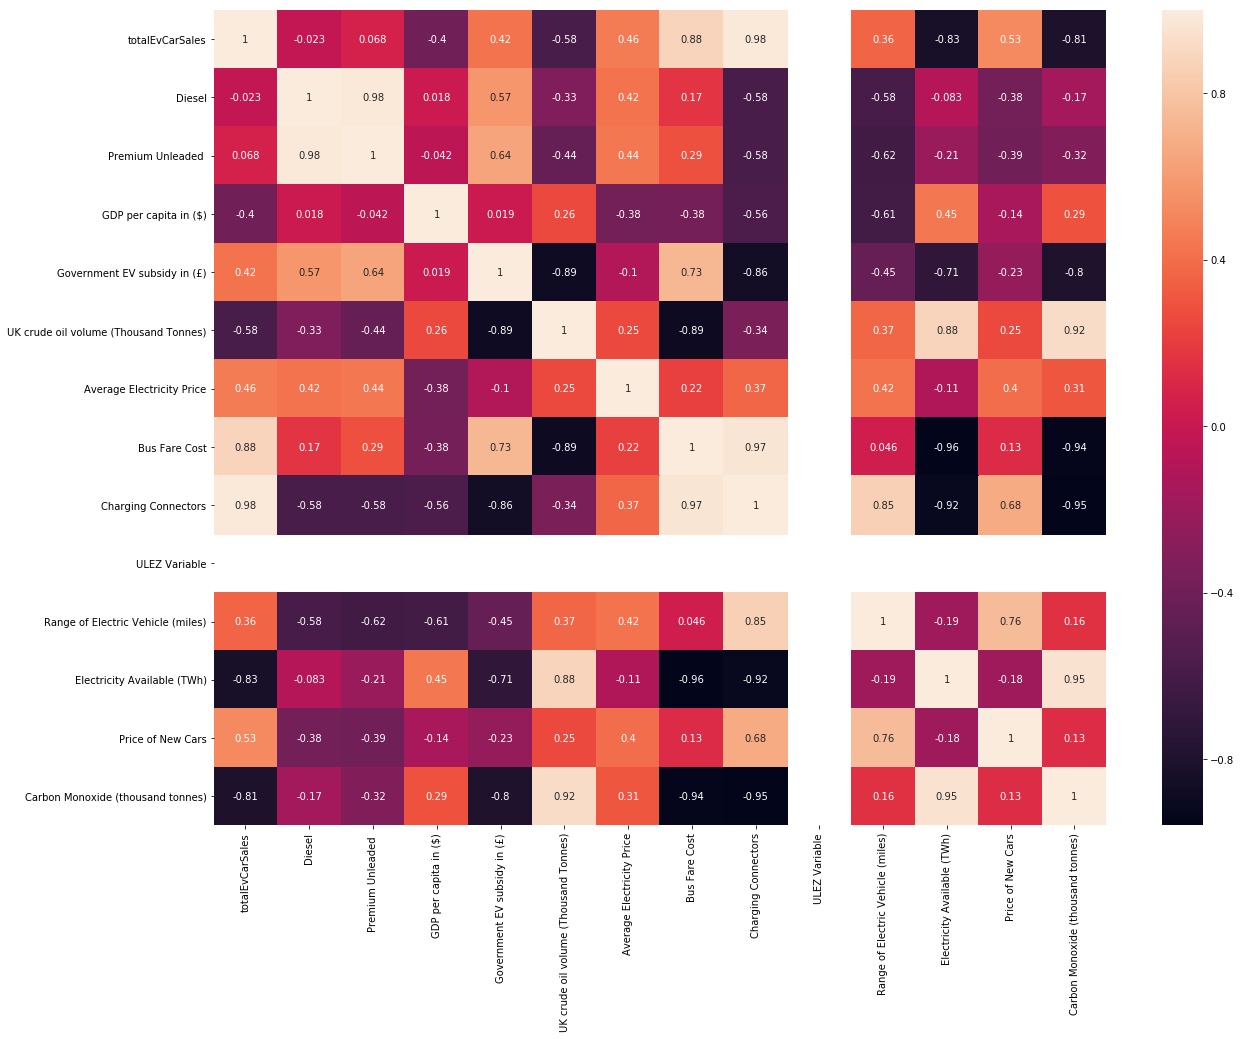

In [57]:
plt.subplots(figsize=(20,15))
sn.heatmap(corrMatrix, annot=True)


In [58]:
y = Final_data["totalEvCarSales"]
x = Final_data[["Diesel", "Premium Unleaded ", "GDP per capita in ($)", "Government EV subsidy in (£)", "UK crude oil volume (Thousand Tonnes)", "UK average inflation rate",
               'Average Electricity Price', 'Bus Fare Cost', 'Charging Connectors', 'Range of Electric Vehicle (miles)', 'Electricity Available (TWh)',
                'Price of New Cars', 'Carbon Monoxide (thousand tonnes)']]

reg_model = sm.OLS(y.astype(float), x.astype(float)) 
reg_model.df_model 
reg_model.fit().summary()

C:\Users\krish\Anaconda3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in reduce
  umr_maximum(a, axis, None, out, keepdims),
C:\Users\krish\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in reduce
  umr_minimum(a, axis, None, None, keepdims),


MissingDataError: exog contains inf or nans